# Chapter 4: Causality and Conditional Independence

This chapter explores the fundamental building blocks of causal graphs: **confounders**, **mediators**, and **colliders**. Understanding these three structures is essential for causal reasoning because they determine when variables are associated, when conditioning helps or hurts our analysis, and how to identify valid adjustment strategies for estimating causal effects.

## The Three Fundamental Causal Structures

Every causal graph, no matter how complex, can be decomposed into combinations of three elementary structures involving three variables. These structures dictate how information flows through the graph and whether statistical associations arise between variables.

| Structure | DAG Pattern | Also Called |
|-----------|-------------|-------------|
| Confounder | X ← Z → Y | Fork, Common Cause |
| Mediator | X → Z → Y | Chain, Causal Path |
| Collider | X → Z ← Y | Inverted Fork, Common Effect |

### What Does "Adjustment" Mean?

**Adjustment** (also called conditioning, controlling for, or stratifying by) means analyzing the relationship between X and Y while holding another variable Z fixed. In practice, this can mean:

- **In regression**: Including Z as a covariate in your model
- **In stratification**: Computing the X-Y relationship separately for each value of Z, then averaging
- **In experiments**: Comparing treated vs. control units that have the same value of Z

Think of it as asking: "What is the relationship between X and Y *among people with the same Z*?"

### Why Adjustment Matters

Adjustment changes what associations we see in data. The critical insight is that adjustment has **opposite effects** depending on the causal structure:

- **Confounders**: Adjustment *removes* a spurious association ✓
- **Mediators**: Adjustment *removes* part of the causal association (sometimes desired, sometimes not)
- **Colliders**: Adjustment *creates* a spurious association ✗

## Confounders (Fork Structure)

```
    Z
   ↙ ↘
  X   Y
```

A **confounder** Z is a common cause of both X and Y. This structure creates a **spurious association** between X and Y—they appear correlated even though neither causes the other.

### Example: Ice Cream and Drowning

- **X**: Ice cream sales
- **Y**: Drowning incidents  
- **Z**: Temperature (confounder)

Hot weather causes both increased ice cream sales and more swimming (leading to drowning). Ice cream doesn't cause drowning, but the data shows a correlation because of the shared cause.

### Statistical Properties

- **Unconditional**: X and Y are **dependent** (associated through Z)
- **Conditional on Z**: X and Y become **independent** (the path is blocked)

$$X \not\perp Y \quad \text{but} \quad X \perp Y \mid Z$$

### Implication for Causal Inference

To estimate the causal effect of X on Y, we **must** adjust for confounders. Failing to do so leads to **confounding bias**—the estimated effect mixes the true causal effect with the spurious association through the confounder.

## Mediators (Chain Structure)

```
X → Z → Y
```

A **mediator** Z lies on the causal pathway between X and Y. The effect of X on Y flows *through* Z. This represents a genuine causal mechanism.

### Example: Education → Income → Health

- **X**: Years of education
- **Y**: Health outcomes
- **Z**: Income (mediator)

Education leads to higher income, and higher income leads to better health (through access to healthcare, nutrition, etc.). Income *mediates* part of the effect of education on health.

### Statistical Properties

- **Unconditional**: X and Y are **dependent** (causal association through Z)
- **Conditional on Z**: X and Y become **independent** (the causal path is blocked)

$$X \not\perp Y \quad \text{but} \quad X \perp Y \mid Z$$

### Implication for Causal Inference

Whether to adjust for a mediator depends on your question:

- **Total effect** of X on Y: Do **NOT** adjust for Z (you want all paths)
- **Direct effect** of X on Y (not through Z): **DO** adjust for Z
- **Indirect effect** through Z: Requires mediation analysis

**Warning**: Incorrectly adjusting for a mediator when you want the total effect will lead to underestimating (or completely missing) the causal relationship.

## Colliders (Inverted Fork Structure)

```
  X   Y
   ↘ ↙
    Z
```

A **collider** Z is a common effect of both X and Y. Both arrows point *into* Z, hence the name "collider"—the causal paths collide at Z.

### Example: Talent, Attractiveness, and Hollywood Success

- **X**: Acting talent
- **Y**: Physical attractiveness
- **Z**: Hollywood success (collider)

Both talent and attractiveness independently contribute to success in Hollywood. In the general population, talent and attractiveness are unrelated. However, among successful Hollywood actors (conditioning on Z), we observe a *negative* correlation: the less talented actors tend to be more attractive (they compensated with looks), and the less attractive actors tend to be more talented.

### Statistical Properties

- **Unconditional**: X and Y are **independent** (no path connects them)
- **Conditional on Z**: X and Y become **dependent** (spurious association opens)

$$X \perp Y \quad \text{but} \quad X \not\perp Y \mid Z$$

This is the **opposite** of confounders and mediators!

### The Collider Bias (Berkson's Paradox)

Conditioning on a collider creates a spurious association between its causes. This is also called:
- **Selection bias**: When Z determines inclusion in a study
- **Berkson's paradox**: The classic example from hospital admission studies
- **Explain-away effect**: Knowing one cause "explains away" the need for the other

### Implication for Causal Inference

**Never** adjust for a collider when estimating the effect of X on Y. Doing so introduces **collider bias**, creating a spurious association where none exists.

This also applies to **descendants of colliders**—conditioning on any variable caused by a collider partially opens the same biasing path.

### More Examples of Collider Bias

Collider bias appears in many disguises. Here are several classic examples:

#### 1. Berkson's Paradox (Hospital Admission)

- **X**: Disease A (e.g., diabetes)
- **Y**: Disease B (e.g., cholecystitis)
- **Z**: Hospital admission (collider)

In the general population, diabetes and cholecystitis are independent. But both can cause hospitalization. Among hospitalized patients, the two diseases appear *negatively* correlated: if a patient doesn't have diabetes, they must have had some other reason (like cholecystitis) to be admitted.

```
  Diabetes    Cholecystitis
       ↘        ↙
      Hospitalized
```

#### 2. The "Low Birth Weight" Paradox

- **X**: Maternal smoking
- **Y**: Birth defects
- **Z**: Low birth weight (collider)

Smoking causes low birth weight. Birth defects also cause low birth weight. Among low birth weight babies, smoking appears *protective* against infant mortality—a paradoxical finding. This happens because conditioning on low birth weight creates a spurious negative association: if the baby has low birth weight but mom didn't smoke, something else (like a birth defect) must explain it.

#### 3. The Dating Pool Paradox ("Why Are All the Good Ones Taken?")

- **X**: Attractiveness
- **Y**: Niceness
- **Z**: Being in your dating pool (collider)

People enter your dating pool based on attractiveness OR personality. In the general population, looks and personality are unrelated. But among people you date, they appear negatively correlated: the attractive ones seem less nice, and the nice ones seem less attractive. This is selection bias from conditioning on "someone I'd date."

#### 4. University Admission

- **X**: Academic ability
- **Y**: Athletic ability
- **Z**: University admission (collider)

A university admits students based on academics OR athletics. In the general population, being smart and being athletic are roughly independent. But among admitted students, they appear negatively correlated: the star athletes tend to have lower grades (they got in on athletics), and the academic stars tend to be less athletic.

#### 5. The "Successful Restaurants" Puzzle

- **X**: Food quality
- **Y**: Location quality
- **Z**: Restaurant survival (collider)

Restaurants survive if they have great food OR a great location. Among restaurants that have survived for 5+ years, food quality and location quality appear negatively correlated: the ones in bad locations must have amazing food to survive, while the ones with mediocre food must have prime locations.

#### The Common Pattern

In each case:
1. Two independent causes (X and Y) both influence an outcome (Z)
2. When we restrict our analysis to a particular value of Z (hospitalized, admitted, surviving, etc.), we create a spurious association between X and Y
3. The association is typically *negative*: if one cause is absent, the other must be present to "explain" why Z occurred

## D-Separation: When Are Variables Independent?

**D-separation** (directional separation) is a simple graphical test to determine whether two variables are independent given what we've observed. Instead of doing complex probability calculations, we can just trace paths on the graph.

### The Core Idea

Think of a causal graph as a system of pipes where "association" flows like water. D-separation tells us whether the pipe between X and Y is open (association can flow) or blocked (no association).

### Three Simple Rules

When tracing any path between X and Y, the path is **blocked** if it hits:

1. **A chain or fork where we adjusted for the middle node**
   - Chain: X → **[Z]** → Y — adjusting for Z blocks the flow
   - Fork: X ← **[Z]** → Y — adjusting for Z blocks the flow

2. **A collider where we did NOT adjust** (and didn't adjust for its descendants)
   - Collider: X → Z ← Y — the path is naturally blocked at Z
   - But if we adjust for Z, we *open* this path!

### Putting It Together

Two variables X and Y are **d-separated** (independent) given a set of adjusted variables if **every path** between them is blocked.

| Path Type | Without Adjustment | With Adjustment |
|-----------|-------------------|-----------------|
| Chain (X → Z → Y) | Open | Blocked |
| Fork (X ← Z → Y) | Open | Blocked |
| Collider (X → Z ← Y) | Blocked | Open |

### Why This Matters

D-separation connects graph structure to statistical independence:
- If X and Y are d-separated given Z → they are conditionally independent given Z
- This lets us read independence relationships directly from the picture, without computing any probabilities

## Summary: Adjustment Decisions

| Variable Type | Should You Adjust? | Why? |
|--------------|-------------------|------|
| Confounder | **Yes** | Removes spurious association |
| Mediator | **Depends** | Blocks the causal path—only adjust if you want the direct effect |
| Collider | **Never** | Creates spurious association where none existed |

### Rules of Thumb

1. **Adjust for confounders** — they create fake associations
2. **Don't adjust for colliders** — that creates fake associations
3. **Think before adjusting for mediators** — do you want the total effect or direct effect?
4. **When in doubt, draw the graph** and trace the paths

## The Big Picture

> **Formal definition**: D-separation and d-connection are graphical abstractions for reasoning about the conditional independence in the joint probability distribution that a causal DAG models.

**Oversimplified version**: The picture tells you which variables are related.

A causal graph encodes a probability distribution—it tells us how all the variables in our system relate to each other probabilistically. D-separation is a shortcut: instead of doing math on the probability distribution, we can just look at the graph and trace paths to figure out which variables are associated and which are independent. If the paths are blocked (d-separated), the variables are independent. If any path is open (d-connected), they're associated.

## The Collider Reversal: Why D-Separation Is Tricky

The most counterintuitive aspect of causal graphs is that **colliders behave opposite to everything else**. This 2×2 table summarizes the key insight:

|  | **m is NOT a collider** | **m IS a collider** |
|--|-------------------------|---------------------|
| | (chain or fork: i→m→j, i←m→j, i←m←j) | (i→m←j) |
| **Don't adjust for m** | D-connected (associated) | D-separated (independent) |
| **Adjust for m** | D-separated (independent) | D-connected (associated) |

### Reading the Table

- **Non-colliders** (chains and forks): The path is *open by default*. Adjusting for m *blocks* the path.
- **Colliders**: The path is *blocked by default*. Adjusting for m *opens* the path.

### The Reversal Pattern

Notice the diagonal pattern—colliders are the mirror image of everything else:

- For chains/forks: **Don't adjust** → associated, **Adjust** → independent
- For colliders: **Don't adjust** → independent, **Adjust** → associated

This is why collider bias catches people off guard. Our instinct is often "control for more variables to be safe," but adjusting for a collider *introduces* bias rather than removing it.

---

In the following sections, we'll implement these concepts using pgmpy to build causal graphs, verify d-separation relationships, and demonstrate how conditioning affects independence through simulation.

In [ ]:
from networkx import is_d_separator
from pgmpy.base import DAG

dag = DAG([("I", "U"), ("I", "M"), ("M", "U"), ("J", "V"), ("J", "M"), ("M", "V")])

print(is_d_separator(dag, {"U"}, {"V"}, {"M"}))
print(is_d_separator(dag, {"U"}, {"V"}, {"M", "I", "J"}))
print(is_d_separator(dag, {"U"}, {"V"}, {"M", "I"}))
print(is_d_separator(dag, {"U"}, {"V"}, {"M", "J"}))

False
True
True
True


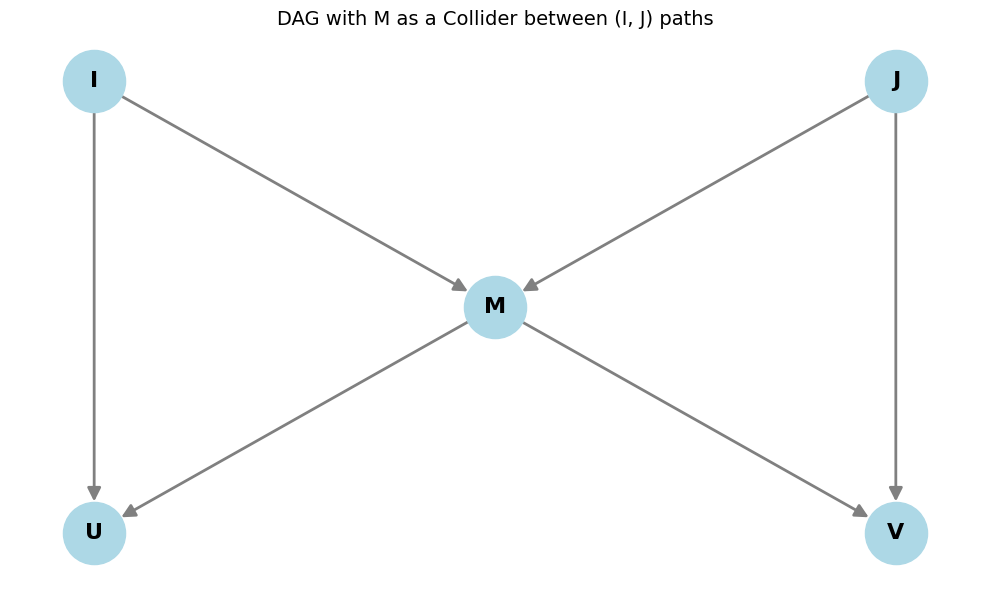

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a figure with the DAG visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Convert to networkx DiGraph for visualization
G = nx.DiGraph(dag.edges())

# Define positions for a clear layout
pos = {
    "I": (0, 1),
    "J": (2, 1),
    "U": (0, 0),
    "M": (1, 0.5),
    "V": (2, 0),
}

# Draw the graph
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_color="lightblue",
    node_size=2000,
    font_size=16,
    font_weight="bold",
    arrows=True,
    arrowsize=20,
    edge_color="gray",
    width=2,
)

ax.set_title("DAG with M as a Collider between (I, J) paths", fontsize=14)
plt.tight_layout()
plt.show()

## The Global Markov Property

We've seen how to use d-separation to read independence from a graph. Now we formalize this connection.

> **Global Markov Property**: D-separation in the causal DAG implies conditional independence in the joint probability distribution.

In notation:

$$U \perp_G V \mid Z \implies U \perp V \mid Z$$

**In plain English**: If U and V are d-separated by Z in graph G, then U and V are conditionally independent given Z in the data.

### Simplified Version

The graph makes promises about the data. If the graph says two variables should be independent (given some conditioning set), then they actually will be independent in any data generated by that causal system.

### Why This Matters: Testing Your Causal Model

The global Markov property gives us a way to **test whether our causal model is wrong**:

1. **Draw your causal graph** based on domain knowledge
2. **Find d-separations** — pairs of variables that should be independent given some conditioning set
3. **Test for independence in data** — use statistical tests (like conditional independence tests)
4. **If the test fails** — the variables are associated when they shouldn't be — your model is wrong

This is powerful because we can *refute* causal models using observational data alone. We can't prove a model is correct, but we can show it's inconsistent with the data.

### The Three Markov Properties

The global Markov property is one of three equivalent ways to express the same fundamental idea:

| Property | Says... |
|----------|---------|
| **Local Markov** | Each variable is independent of its non-descendants given its parents |
| **Global Markov** | D-separation implies conditional independence |
| **Factorization** | The joint distribution factors according to the graph structure |

If any one of these is true for a graph and distribution, all three are true. They're different lenses on the same underlying connection between graph structure and probability.

In [1]:
from pgmpy.base import DAG

dag = DAG([("I", "U"), ("I", "M"), ("M", "U"), ("J", "V"), ("J", "M"), ("M", "V")])
dag.get_independencies()

(V ⟂ I | J, M)
(V ⟂ U | M, I)
(J ⟂ U | M, I)
(J ⟂ I)

In [2]:
import pandas as pd

survey_url = "https://raw.githubusercontent.com/altdeep/causalML/master/datasets/transportation_survey.csv"
fulldata = pd.read_csv(survey_url)
data = fulldata[0:30]
print(data[0:5])

       A  S     E    O      R      T
0  adult  F  high  emp  small  train
1  young  M  high  emp    big    car
2  adult  M   uni  emp    big  other
3    old  F   uni  emp    big    car
4  young  F   uni  emp    big    car


In [3]:
from pgmpy.estimators.CITests import chi_square

significance = 0.05
result = chi_square(
    X="E",
    Y="T",
    Z=["O", "R"],
    data=data,
    boolean=False,
    significance_level=significance,
)

print(result)

(np.float64(1.1611111111111112), np.float64(0.5595873983053805), 2)


In [4]:
from pgmpy.estimators.CITests import chi_square

significance = 0.05
result = chi_square(
    X="E",
    Y="T",
    Z=["O", "R"],
    data=data,
    boolean=True,
    significance_level=significance,
)

print(result)

True


In [6]:
from pprint import pprint
from pgmpy.base import DAG
from pgmpy.independencies import IndependenceAssertion

dag = DAG([("A", "E"), ("S", "E"), ("E", "O"), ("E", "R"), ("O", "T"), ("R", "T")])
dseps = dag.get_independencies()


def test_dsep(dsep: IndependenceAssertion):
    test_outputs = []
    for X in list(dsep.get_assertion()[0]):
        for Y in list(dsep.get_assertion()[1]):
            Z = list(dsep.get_assertion()[2])
    test_result = chi_square(
        X=X, Y=Y, Z=Z, data=data, boolean=True, significance_level=significance
    )
    assertion = IndependenceAssertion(X, Y, Z)
    test_outputs.append((assertion, test_result))
    return test_outputs


results = [test_dsep(dsep) for dsep in dseps.get_assertions()]
results = dict([item for sublist in results for item in sublist])
pprint(results)

{(T ⟂ E | R, O): np.True_,
 (T ⟂ S | R, O): np.True_,
 (O ⟂ R | E): np.False_,
 (S ⟂ A): np.True_,
 (R ⟂ S | E): np.True_,
 (O ⟂ S | E): np.True_,
 (T ⟂ A | R, O): np.True_,
 (O ⟂ A | E): np.True_,
 (R ⟂ A | E): np.True_}


In [7]:
num_pass = sum(results.values())
num_dseps = len(dseps.independencies)
num_fail = num_dseps - num_pass
print(num_fail / num_dseps)

0.1111111111111111


## Why Conditional Independence Matters

Conditional independence is the bridge between causal graphs and data. It matters for three key reasons:

1. **Model Testing**: If your causal graph implies that X ⊥ Y | Z, but the data shows X and Y are associated even after conditioning on Z, your model is wrong. This lets you *refute* causal models with observational data.

2. **Identifying Causal Effects**: To estimate the causal effect of X on Y, you need to find a set of variables Z such that conditioning on Z blocks all spurious paths (confounding) while leaving causal paths open. Conditional independence tells you which adjustment sets work.

3. **Efficient Factorization**: Conditional independencies allow the joint distribution to factor into simpler pieces. Instead of estimating P(A, B, C, D, E) directly, you can estimate smaller conditional distributions and multiply them together—this is what makes Bayesian networks computationally tractable.

## Understanding the Notation: E ⊥ T | O, R

The notation **E ⊥ T | O, R** is read as "**E is conditionally independent of T given O and R**."

| Symbol | Meaning |
|--------|---------|
| **E ⊥ T** | E is independent of T |
| **\|** | "given" or "conditional on" |
| **O, R** | the conditioning set (both O and R are held fixed) |

### What It Means

This statement claims that once you know the values of O (occupation) and R (residence size), knowing E (education level) gives you no additional information about T (transportation mode), and vice versa.

Mathematically: $P(T \mid E, O, R) = P(T \mid O, R)$

### Why It Holds in This DAG

Looking at the causal graph:

```
A → E ← S
    ↓
    O → T
    ↓   ↑
    R ───┘
```

E affects T only *through* the mediators O and R. Once you condition on O and R, the path from E to T is blocked (chain structure). This is why E ⊥ T | O, R holds—the d-separation in the graph implies conditional independence in the data.

### The Chi-Square Test Result

The output `(1.16, 0.56, 2)` means:
- **Chi-square statistic**: 1.16
- **p-value**: 0.56 (high → fail to reject independence)
- **Degrees of freedom**: 2

Since p-value (0.56) > significance level (0.05), we accept that E and T are conditionally independent given O and R—consistent with what the graph predicts via d-separation.

In [11]:
# Listing 4.8 Bootstrap analysis of sensitivity of test of E ⊥ T | O, R to sample size

from numpy import mean, quantile
from joblib import Parallel, delayed


def sample_p_val(data_size, data, alpha):
    bootstrap_data = data.sample(n=data_size, replace=True)
    result = chi_square(
        X="E",
        Y="T",
        Z=["O", "R"],
        data=bootstrap_data,
        boolean=False,
        significance_level=alpha,
    )
    p_val = result[1]
    return p_val


def estimate_p_val(data_size, data=fulldata, boot_size=1000, α=0.05):
    samples = Parallel(n_jobs=-1)(
        delayed(sample_p_val)(data_size, data, α) for _ in range(boot_size)
    )
    positive_tests = [p_val > significance for p_val in samples]
    prob_conclude = mean(positive_tests)
    p_estimate = mean(samples)
    quantile_05, quantile_95 = quantile(samples, [0.05, 0.95])
    lower_error = p_estimate - quantile_05
    higher_error = quantile_95 - p_estimate
    return p_estimate, lower_error, higher_error, prob_conclude


data_size = range(30, 1000, 20)
result = list(zip(*[estimate_p_val(size) for size in data_size]))

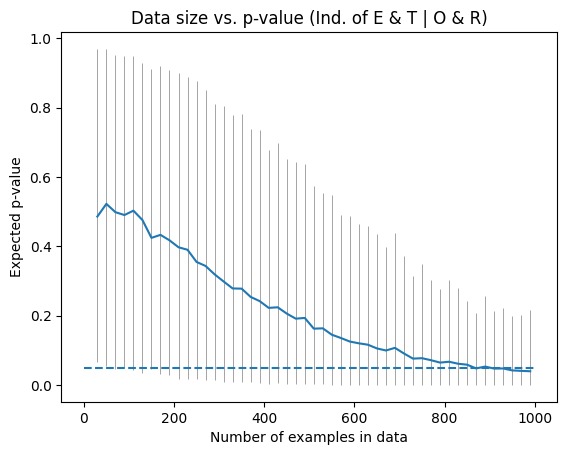

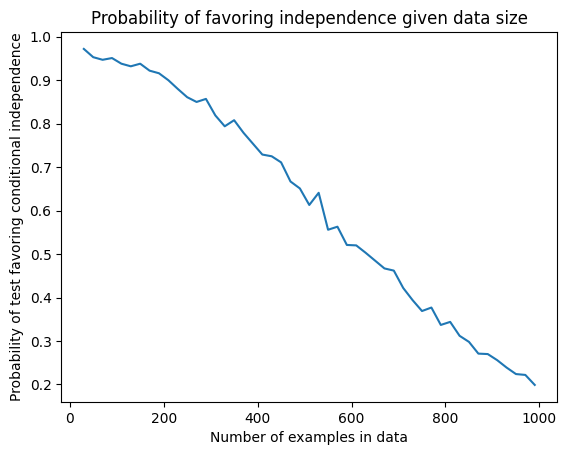

In [13]:
# Listing 4.9 Visualize dependence of conditional independence testing on data size

import numpy as np
import matplotlib.pyplot as plt

p_vals, lower_bars, higher_bars, probs_conclude_indep = result

plt.title("Data size vs. p-value (Ind. of E & T | O & R)")
plt.xlabel("Number of examples in data")
plt.ylabel("Expected p-value")
error_bars = np.array([lower_bars, higher_bars])
plt.errorbar(data_size, p_vals, yerr=error_bars, ecolor="grey", elinewidth=0.5)
plt.hlines(significance, 0, 1000, linestyles="dashed")
plt.show()

plt.title("Probability of favoring independence given data size")
plt.xlabel("Number of examples in data")
plt.ylabel("Probability of test favoring conditional independence")
plt.plot(data_size, probs_conclude_indep)
plt.show()